<a href="https://colab.research.google.com/github/vivekkothekarr/ML-Lab-Practicals/blob/main/Practical_5_Vivek_Kothekar_(CS23110).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AIM: To build and evaluate a decision tree model for classification tasks and study the effect of tree depth and spilitting criteria.

**Name:** Vivek Jain
**USN:** CS23094

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path="/content/drive/MyDrive/ML_lab/daily_weather.csv"
df=pd.read_csv(path)
df.head(5)

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
0,0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000
1,1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,24.328697,19.426597
2,2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000
3,3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,12.742547
4,4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,76.740000


In [ ]:
df.describe()

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
count,1095.000000,1092.000000,1090.000000,1091.000000,1092.000000,1092.000000,1091.000000,1089.000000,1092.000000,1095.000000,1095.000000
mean,547.000000,918.882551,64.933001,142.235511,5.508284,148.953518,7.019514,0.203079,294.108052,34.241402,35.344727
std,316.243577,3.184161,11.175514,69.137859,4.552813,67.238013,5.598209,1.593952,1598.078779,25.472067,22.524079
min,0.000000,907.990000,36.752000,15.500000,0.693451,28.900000,1.185578,0.000000,0.000000,6.090000,5.300000
25%,273.500000,916.550000,57.281000,65.972506,2.248768,76.553003,3.067477,0.000000,0.000000,15.092243,17.395000
50%,547.000000,918.921045,65.715479,166.000000,3.871333,177.300000,4.943637,0.000000,0.000000,23.179259,24.380000
75%,820.500000,921.160073,73.450974,191.000000,7.337163,201.233153,8.947760,0.000000,0.000000,45.400000,52.060000
max,1094.000000,929.320000,98.906000,343.400000,23.554978,312.200000,29.840780,24.020000,17704.000000,92.620000,92.250000


In [ ]:
df.info

<bound method DataFrame.info of       number  air_pressure_9am  air_temp_9am  avg_wind_direction_9am  \
0          0        918.060000     74.822000              271.100000   
1          1        917.347688     71.403843              101.935179   
2          2        923.040000     60.638000               51.000000   
3          3        920.502751     70.138895              198.832133   
4          4        921.160000     44.294000              277.800000   
...      ...               ...           ...                     ...   
1090    1090        918.900000     63.104000              192.900000   
1091    1091        918.710000     49.568000              241.600000   
1092    1092        916.600000     71.096000              189.300000   
1093    1093        912.600000     58.406000              172.700000   
1094    1094        921.530000     77.702000               97.100000   

      avg_wind_speed_9am  max_wind_direction_9am  max_wind_speed_9am  \
0               2.080354              295.400000            2.863283   
1               2.443009              140.471548            3.533324   
2              17.067852               63.700000           22.100967   
3               4.337363              211.203341            5.190045   
4               1.856660              136.500000            2.863283   
...                  ...                     ...                 ...   
1090            3.869906              207.300000            5.212070   
1091            1.811921              227.400000            2.371156   
1092            3.064608              200.800000            3.892276   
1093            3.825167              189.100000            4.764682   
1094            3.265932              125.900000            4.451511   

      rain_accumulation_9am  rain_duration_9am  relative_humidity_9am  \
0                       0.0                0.0              42.420000   
1                       0.0                0.0              24.328697   
2                       0.0               20.0               8.900000   
3                       0.0                0.0              12.189102   
4                       8.9            14730.0              92.410000   
...                     ...                ...                    ...   
1090                    0.0                0.0              26.020000   
1091                    0.0                0.0              90.350000   
1092                    0.0                0.0              45.590000   
1093                    0.0                0.0              64.840000   
1094                    0.0                0.0              14.560000   

      relative_humidity_3pm  
0                 36.160000  
1                 19.426597  
2                 14.460000  
3                 12.742547  
4                 76.740000  
...                     ...  
1090              38.180000  
1091              73.340000  
1092              52.310000  
1093              58.280000  
1094              15.100000  

[1095 rows x 11 columns]>

In [ ]:
df.shape

(1095, 11)

In [ ]:
df.columns

Index(['number', 'air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am',
       'relative_humidity_3pm'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
number,0
air_pressure_9am,3
air_temp_9am,5
avg_wind_direction_9am,4
avg_wind_speed_9am,3
max_wind_direction_9am,3
max_wind_speed_9am,4
rain_accumulation_9am,6
rain_duration_9am,3
relative_humidity_9am,0


In [ ]:
df.isnull().any().any()

np.True_

In [ ]:
df[df.isnull().any(axis = 1)]

,number,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm
16,16,917.890000,NaN,169.200000,2.192201,196.800000,2.930391,0.000,0.000000,48.990000,51.190000
111,111,915.290000,58.820000,182.600000,15.613841,189.000000,NaN,0.000,0.000000,21.500000,29.690000
177,177,915.900000,NaN,183.300000,4.719943,189.900000,5.346287,0.000,0.000000,29.260000,46.500000
262,262,923.596607,58.380598,47.737753,10.636273,67.145843,13.671423,0.000,NaN,17.990876,16.461685
277,277,920.480000,62.600000,194.400000,2.751436,NaN,3.869906,0.000,0.000000,52.580000,54.030000
334,334,916.230000,75.740000,149.100000,2.751436,187.500000,4.183078,NaN,1480.000000,31.880000,32.900000
358,358,917.440000,58.514000,55.100000,10.021491,NaN,12.705819,0.000,0.000000,13.880000,25.930000
361,361,920.444946,65.801845,49.823346,21.520177,61.886944,25.549112,NaN,40.364018,12.278715,7.618649
381,381,918.480000,66.542000,90.900000,3.467257,89.400000,4.406772,NaN,0.000000,20.640000,14.350000
409,409,NaN,67.853833,65.880616,4.328594,78.570923,5.216734,0.000,0.000000,18.487385,20.356594


In [ ]:
del df['number']
df.columns

Index(['air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am',
       'relative_humidity_3pm'],
      dtype='object')

In [ ]:
df.columns

Index(['air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am',
       'relative_humidity_3pm'],
      dtype='object')

In [ ]:
df.shape

(1095, 10)

In [ ]:
before_rows=df.shape[0]
df=df.dropna()
after_rows=df.shape[0]

print("Before rows:", before_rows)
print("After rows:", after_rows)
print("The no. of dropped rows are:", before_rows - after_rows)

Before rows: 1095
After rows: 1064
The no. of dropped rows are: 31


In [ ]:
clean_data = df.copy()
clean_data['high_humidity_label'] = (clean_data['relative_humidity_3pm'] > 24.99)*1
print(clean_data['high_humidity_label'])

0       1
1       0
2       0
3       0
4       1
       ..
1090    1
1091    1
1092    1
1093    1
1094    0
Name: high_humidity_label, Length: 1064, dtype: int64


In [ ]:
clean_data.columns

Index(['air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am',
       'relative_humidity_3pm', 'high_humidity_label'],
      dtype='object')

In [ ]:
clean_data

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am,relative_humidity_9am,relative_humidity_3pm,high_humidity_label
0,918.060000,74.822000,271.100000,2.080354,295.400000,2.863283,0.0,0.0,42.420000,36.160000,1
1,917.347688,71.403843,101.935179,2.443009,140.471548,3.533324,0.0,0.0,24.328697,19.426597,0
2,923.040000,60.638000,51.000000,17.067852,63.700000,22.100967,0.0,20.0,8.900000,14.460000,0
3,920.502751,70.138895,198.832133,4.337363,211.203341,5.190045,0.0,0.0,12.189102,12.742547,0
4,921.160000,44.294000,277.800000,1.856660,136.500000,2.863283,8.9,14730.0,92.410000,76.740000,1
...,...,...,...,...,...,...,...,...,...,...,...
1090,918.900000,63.104000,192.900000,3.869906,207.300000,5.212070,0.0,0.0,26.020000,38.180000,1
1091,918.710000,49.568000,241.600000,1.811921,227.400000,2.371156,0.0,0.0,90.350000,73.340000,1
1092,916.600000,71.096000,189.300000,3.064608,200.800000,3.892276,0.0,0.0,45.590000,52.310000,1
1093,912.600000,58.406000,172.700000,3.825167,189.100000,4.764682,0.0,0.0,64.840000,58.280000,1


In [ ]:
del clean_data['relative_humidity_3pm']
del clean_data['relative_humidity_9am']
clean_data.columns

Index(['air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'high_humidity_label'],
      dtype='object')

In [ ]:
df.shape

(1064, 10)

In [ ]:
clean_data.shape

(1064, 9)

In [ ]:
X=clean_data.iloc[:,:-1]
y=clean_data.iloc[:,-1]
print(X)
print(y)

      air_pressure_9am  air_temp_9am  avg_wind_direction_9am  \
0           918.060000     74.822000              271.100000   
1           917.347688     71.403843              101.935179   
2           923.040000     60.638000               51.000000   
3           920.502751     70.138895              198.832133   
4           921.160000     44.294000              277.800000   
...                ...           ...                     ...   
1090        918.900000     63.104000              192.900000   
1091        918.710000     49.568000              241.600000   
1092        916.600000     71.096000              189.300000   
1093        912.600000     58.406000              172.700000   
1094        921.530000     77.702000               97.100000   

      avg_wind_speed_9am  max_wind_direction_9am  max_wind_speed_9am  \
0               2.080354              295.400000            2.863283   
1               2.443009              140.471548            3.533324   
2              

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state=42)

In [ ]:
y_train

,high_humidity_label
5,1
315,1
918,1
105,1
98,1
...,...
336,1
476,1
123,1
1075,0


In [ ]:
X_train

,air_pressure_9am,air_temp_9am,avg_wind_direction_9am,avg_wind_speed_9am,max_wind_direction_9am,max_wind_speed_9am,rain_accumulation_9am,rain_duration_9am
5,915.30000,78.404000,182.800000,9.932014,189.000000,10.983375,0.02,170.0
315,917.09000,63.266000,175.500000,6.733189,186.300000,7.963506,0.00,0.0
918,915.07000,58.046000,186.200000,7.695074,195.600000,8.992499,0.00,0.0
105,917.40000,73.868000,181.700000,4.138339,189.800000,4.764682,0.05,460.0
98,916.52000,51.638000,190.800000,7.404271,198.000000,8.388525,0.37,2170.0
...,...,...,...,...,...,...,...,...
336,912.89000,45.320000,213.400000,21.250930,220.500000,23.577348,0.03,250.0
476,917.18000,62.834000,186.300000,3.221194,197.700000,4.026492,0.00,0.0
123,920.18000,62.744000,32.600000,3.019869,51.300000,3.825167,0.00,0.0
1075,922.85811,64.989361,63.483047,10.261187,73.170504,11.949206,0.00,0.0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train

array([[-1.12271037,  1.19919546,  0.56380938, ...,  0.74882022,
        -0.1110189 , -0.07898878],
       [-0.5564238 , -0.18204988,  0.45875942, ...,  0.20133281,
        -0.12242661, -0.18801274],
       [-1.19547345, -0.65834138,  0.61273676, ...,  0.38788407,
        -0.12242661, -0.18801274],
       ...,
       [ 0.42113234, -0.22967903, -1.59762952, ..., -0.54892772,
        -0.12242661, -0.18801274],
       [ 1.26838251, -0.02480427, -1.15320995, ...,  0.9239205 ,
        -0.12242661, -0.18801274],
       [-0.04708225,  0.37964561,  0.25153758, ..., -1.02747227,
        -0.12242661, -0.18801274]])

In [ ]:
humidity_classifier = DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)
humidity_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)

[Text(0.39285714285714285, 0.9166666666666666, 'x[0] <= 0.103\ngini = 0.5\nsamples = 744\nvalue = [370, 374]'),
 Text(0.21428571428571427, 0.75, 'x[1] <= 0.646\ngini = 0.404\nsamples = 391\nvalue = [110, 281]'),
 Text(0.30357142857142855, 0.8333333333333333, 'True  '),
 Text(0.14285714285714285, 0.5833333333333334, 'x[2] <= -1.096\ngini = 0.201\nsamples = 230\nvalue = [26, 204]'),
 Text(0.07142857142857142, 0.4166666666666667, 'gini = 0.499\nsamples = 25\nvalue = [12, 13]'),
 Text(0.21428571428571427, 0.4166666666666667, 'gini = 0.127\nsamples = 205\nvalue = [14.0, 191.0]'),
 Text(0.2857142857142857, 0.5833333333333334, 'gini = 0.499\nsamples = 161\nvalue = [84, 77]'),
 Text(0.5714285714285714, 0.75, 'x[1] <= -0.884\ngini = 0.388\nsamples = 353\nvalue = [260, 93]'),
 Text(0.4821428571428571, 0.8333333333333333, '  False'),
 Text(0.42857142857142855, 0.5833333333333334, 'x[2] <= -1.287\ngini = 0.451\nsamples = 64\nvalue = [22, 42]'),
 Text(0.35714285714285715, 0.4166666666666667, 'x[3] 

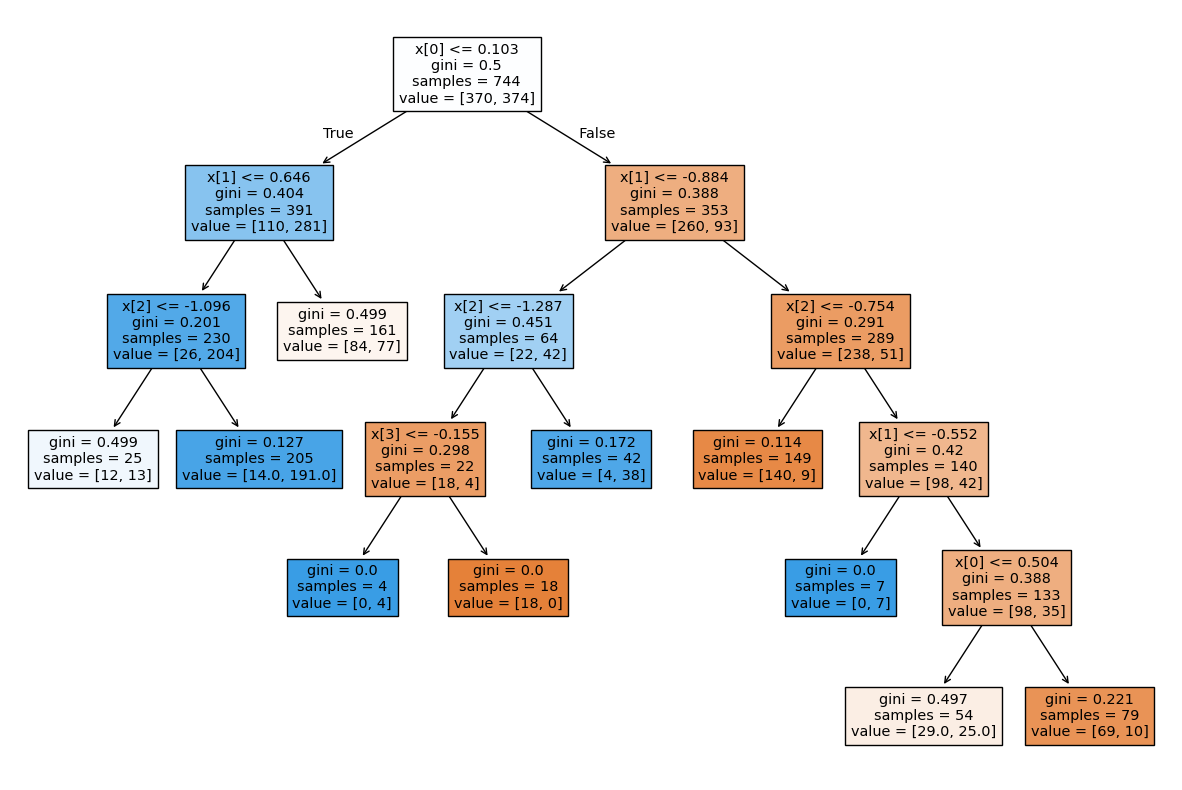

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(15,10))
plot_tree(humidity_classifier, filled=True)

In [ ]:
y_pred = humidity_classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
print(confusion_matrix(y_test, y_pred))

[[138  27]
 [ 52 103]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.84      0.78       165
           1       0.79      0.66      0.72       155

    accuracy                           0.75       320
   macro avg       0.76      0.75      0.75       320
weighted avg       0.76      0.75      0.75       320

